# Regresión Logística

La regresión logística implica que las salidas no son numéricas sino categoricas.
<br>
Si los predictores son categoricos entonces utilizamos variables dummies.
<br>
Por ejemplo, dado un puntaje de SAT queremos saber si un estudiante será o no admitido en la universidad.
<br>
La regresión logística calcula la probabilidad de que ocurra un evento.
<br>
La curva que se calcula es una funcón logística: forma de S y acotada [0,1].
<br> <br>
Modelo de Regresion Logistica:
<br> <br>
$ p(X) = \frac{e^{B_0+B_1x_1+...+b_kx_k}}{1+e^{B_0+B_1x_1+...+b_kx_k}}$
<br><br>
Podemos transformar esta ecuacion.
<br>
$ \frac{p(X)}{1-P(X)} = e^{B_0+B_1x_1+...+b_kx_k} $
<br>
La parte izquierda de la ecuación se conoce como Odds
<br><br>
Modelo de Regresión Logit:
<br><br>
$ log(\frac{p(X)}{1-P(X)}) = B_0+B_1x_1+...+b_kx_k $
<br>
Podemos usar cualquiera de los dos modelos: Regresión Logistica o Regrasión Logit

## Importar bibliotecas

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Datos

In [10]:
raw_data = pd.read_csv('Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
5,1755,Yes
6,1775,Yes
7,1887,Yes
8,1893,Yes
9,1580,No


In [11]:
# Sustituimos las entradas No=0 y Yes=1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
5,1755,1
6,1775,1
7,1887,1
8,1893,1
9,1580,0


## Variables

In [15]:
# Definimos variables dependientes e independientes
y = data['Admitted']
x1 = data['SAT']

## Graficamos

### Gráfica de puntos

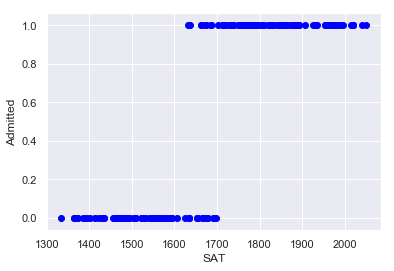

In [16]:
# Tenemos una grafica con solo dos valores binarios
plt.scatter(x1,y, color='blue')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

### Regresión lineal

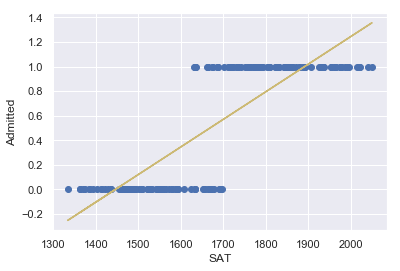

In [12]:
# Calculamos la linea de regresion 
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

# Graficamos los puntos
plt.scatter(x1,y,color = 'blue')
# Graficamos la regresion lineal.
# Los coeficientes estan dentro de los parametros
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,color='orange')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

La regresión Lineal no nos sirve, no ajusta bien los datos, icluso se sale del rango de [0,1] de los datos.

### Curva de regresión logística

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


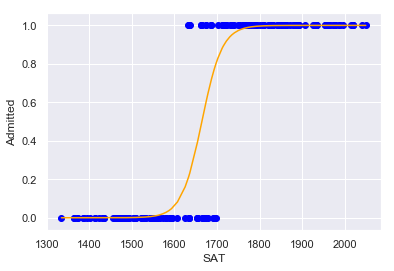

In [13]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='blue')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.plot(x_sorted,f_sorted,color='orange')
plt.show()

La curva en realidad muestra la probabilidad de ser admitido dado un puntaje de SAT.
<br>
La probabilidad de ser admitido con un puntaje SAT bajo es 0, mientras que la probabilidad de ser admitido con un puntaje SAT alto es 1.
<br>
Un puntaje SAT entre 1600 y 1800 va cambiando. Con un valor SAT de 1650 hay un 50% de probabilidad de ser admitido, esta probabilidad sube a 80% con un valor SAT de 1700.

## Resumen de resultados

In [18]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Mar 2021   Pseudo R-squ.:                  0.7992
Time:                        22:46:23   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Entendiendo el resumen

<ul>
    <li> Method: MLE (Maximum Likelihood Estimation)
        <br>
        Función Likelihood: estima la probabilidad de que el modelo describa la verdadera relación entre las variables. Entre más alto sea la función likelihood más cercano es la estimación del modelo al real.
        </li>
            <li> LL Null (log likelihood null) <br>
                Es el log-likelihood de un modelo sin variables independientes. Y=B0
                </li>
                    <li>
                        LLR (log likelihood ratio) <br>
                        Mide si el modelo es estadisticamente diferente de LL-Null 
                        </li>
                            <li> Pseudo R-squared <br>
                                Algunas métricas que se asemejan a R-squared son: AIC, BIC, McFadden's R-squared.
                            </li>
                            </ul>


## LL-Null

In [22]:
# Creamos una variable de solo 1s
const = np.ones(168)
const

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
reg_null = sm.Logit(y,const)
results_null = reg_null.fit()
results_null.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Thu, 18 Mar 2021   Pseudo R-squ.:               7.410e-11
Time:                        23:25:32   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""